In [1]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn import preprocessing

In [4]:
folder1=r"C:\CV dataset\car"
folder2=r"C:\CV dataset\ncar"

In [5]:
i=0
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500, 300)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #low pass filter to smoothen the image.....helps to remove noise
    kernel = np.ones((3,3),dtype = 'uint8')/9 
    img1 = cv2.filter2D(img,-1,kernel)
    
    #high pass filter to sharpen the image.....enhances the edges
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    img2 = cv2.filter2D(img1,-1,kernel)
    
    #gamma transformation to brighten the image
    img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8')
    
    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('C:\CV dataset\\car.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (599, 128)
descriptor shape  1  :  (514, 128)
descriptor shape  2  :  (593, 128)
descriptor shape  3  :  (572, 128)
descriptor shape  4  :  (707, 128)
descriptor shape  5  :  (797, 128)
descriptor shape  6  :  (897, 128)
descriptor shape  7  :  (525, 128)
descriptor shape  8  :  (544, 128)
descriptor shape  9  :  (948, 128)
descriptor shape  10  :  (1260, 128)
descriptor shape  11  :  (959, 128)
descriptor shape  12  :  (1415, 128)
descriptor shape  13  :  (566, 128)
descriptor shape  14  :  (736, 128)
descriptor shape  15  :  (819, 128)
descriptor shape  16  :  (1148, 128)
descriptor shape  17  :  (1100, 128)
descriptor shape  18  :  (1018, 128)
descriptor shape  19  :  (840, 128)
descriptor shape  20  :  (767, 128)
descriptor shape  21  :  (746, 128)
descriptor shape  22  :  (1113, 128)
descriptor shape  23  :  (711, 128)
descriptor shape  24  :  (1021, 128)
descriptor shape  25  :  (612, 128)
descriptor shape  26  :  (552, 128)
descriptor shape  27  :  (933, 

In [6]:
data1 = pd.read_csv(r'C:\CV dataset\car.csv',header=None,dtype='uint8')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format

data1=data1.astype(np.uint8) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,77,6,1,0,0,3,3,24,199,9,...,10,15,0,0,0,0,0,0,0,0
1,29,16,5,47,101,13,1,0,116,33,...,0,4,1,0,0,0,0,0,0,0
2,59,15,0,0,1,21,10,16,153,19,...,3,63,0,0,9,12,5,1,1,0
3,21,20,3,0,0,2,2,3,83,53,...,0,29,61,18,3,0,0,0,0,2
4,1,3,3,8,21,78,42,2,41,110,...,20,25,12,20,30,109,58,7,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119859,122,7,1,2,3,0,0,37,75,52,...,0,31,5,4,6,122,122,0,0,0
2119860,26,15,7,3,1,2,5,20,126,18,...,0,45,28,46,30,3,1,6,11,29
2119861,3,0,0,2,31,0,0,1,11,0,...,17,15,21,16,28,13,9,36,46,45
2119862,128,51,2,0,0,0,1,50,128,128,...,16,8,0,0,1,6,1,2,8,1


In [7]:
i=0
for filename in os.listdir(folder2):
    
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500, 300)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #low pass filter to smoothen the image.....helps to remove noise
    kernel = np.ones((3,3),dtype = 'uint8')/9 
    img1 = cv2.filter2D(img,-1,kernel)
    
    #high pass filter to sharpen the image.....enhances the edges
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    img2 = cv2.filter2D(img1,-1,kernel)
    
    #gamma transformation to brighten the image
    img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8')
    
    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('C:\CV dataset\\ncar.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (1166, 128)
descriptor shape  1  :  (388, 128)
descriptor shape  2  :  (479, 128)
descriptor shape  3  :  (793, 128)
descriptor shape  4  :  (224, 128)
descriptor shape  5  :  (238, 128)
descriptor shape  6  :  (841, 128)
descriptor shape  7  :  (3832, 128)
descriptor shape  8  :  (419, 128)
descriptor shape  9  :  (1525, 128)
descriptor shape  10  :  (847, 128)
descriptor shape  11  :  (1195, 128)
descriptor shape  12  :  (1629, 128)
descriptor shape  13  :  (803, 128)
descriptor shape  14  :  (1383, 128)
descriptor shape  15  :  (2835, 128)
descriptor shape  16  :  (1263, 128)
descriptor shape  17  :  (442, 128)
descriptor shape  18  :  (1423, 128)
descriptor shape  19  :  (1301, 128)
descriptor shape  20  :  (1639, 128)
descriptor shape  21  :  (1308, 128)
descriptor shape  22  :  (1683, 128)
descriptor shape  23  :  (1167, 128)
descriptor shape  24  :  (553, 128)
descriptor shape  25  :  (1341, 128)
descriptor shape  26  :  (1357, 128)
descriptor shape  27  

In [8]:
data2= pd.read_csv(r'C:\CV dataset\ncar.csv',header=None,dtype='uint8')
data2=data2.astype(np.uint8)
data2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,0,0,0,0,0,0,0,1,0,...,1,0,19,0,0,13,39,11,12,29
1,6,0,0,0,1,7,16,27,8,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,1,0,0,6,6,0,...,5,4,7,4,0,3,5,6,19,9
3,0,0,8,16,3,2,1,0,6,6,...,23,12,0,0,45,59,13,34,15,0
4,3,0,0,0,1,43,32,8,9,0,...,0,1,0,1,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064422,5,29,33,0,0,0,0,0,0,7,...,4,9,17,78,67,11,0,0,0,0
2064423,0,0,2,37,23,28,27,1,43,77,...,1,7,4,24,59,55,22,32,13,5
2064424,0,0,0,0,0,0,0,0,1,0,...,14,4,28,107,20,14,6,19,24,9
2064425,24,5,18,52,33,55,29,29,98,8,...,127,60,0,0,2,9,4,1,32,16


In [9]:
data=data1.append(data2)

In [10]:
csv_data=data.to_csv('C:\CV dataset\Sift_Final.csv', mode='a', header=False,index=False)

In [11]:
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,77,6,1,0,0,3,3,24,199,9,...,10,15,0,0,0,0,0,0,0,0
1,29,16,5,47,101,13,1,0,116,33,...,0,4,1,0,0,0,0,0,0,0
2,59,15,0,0,1,21,10,16,153,19,...,3,63,0,0,9,12,5,1,1,0
3,21,20,3,0,0,2,2,3,83,53,...,0,29,61,18,3,0,0,0,0,2
4,1,3,3,8,21,78,42,2,41,110,...,20,25,12,20,30,109,58,7,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064422,5,29,33,0,0,0,0,0,0,7,...,4,9,17,78,67,11,0,0,0,0
2064423,0,0,2,37,23,28,27,1,43,77,...,1,7,4,24,59,55,22,32,13,5
2064424,0,0,0,0,0,0,0,0,1,0,...,14,4,28,107,20,14,6,19,24,9
2064425,24,5,18,52,33,55,29,29,98,8,...,127,60,0,0,2,9,4,1,32,16


# Elbow Method

In [12]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

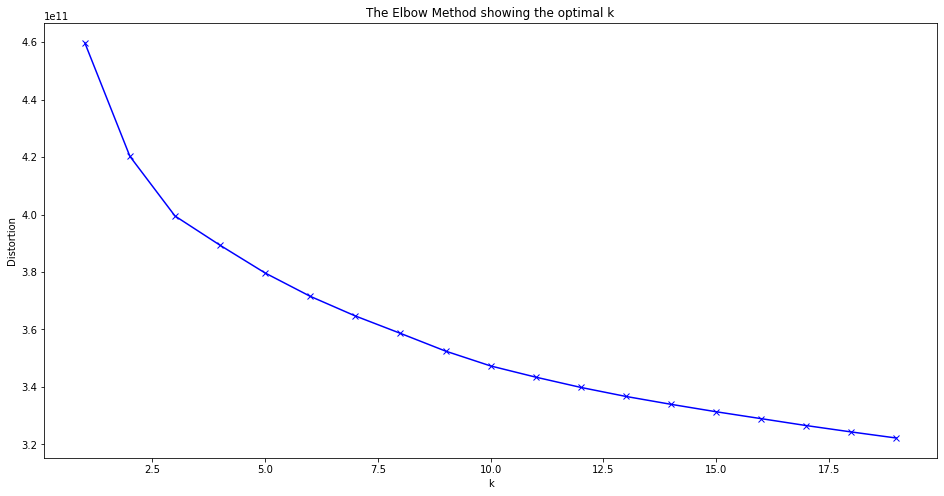

In [13]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Silhouette Method

In [14]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster 

In [16]:
for i in range(3,21):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(data).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(data,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.06672834748887972
Silhouette score for k(clusters) = 4 is 0.0575750265839488
Silhouette score for k(clusters) = 5 is 0.05338741436200946
Silhouette score for k(clusters) = 6 is 0.053052949831467106
Silhouette score for k(clusters) = 7 is 0.054106830542001536
Silhouette score for k(clusters) = 8 is 0.054793510746028076
Silhouette score for k(clusters) = 9 is 0.05551640436939846
Silhouette score for k(clusters) = 10 is 0.047602278641097825
Silhouette score for k(clusters) = 11 is 0.04848831884740611
Silhouette score for k(clusters) = 12 is 0.04867770018573092
Silhouette score for k(clusters) = 13 is 0.045863929432097904
Silhouette score for k(clusters) = 14 is 0.044000796261338807
Silhouette score for k(clusters) = 15 is 0.04656401938249303
Silhouette score for k(clusters) = 16 is 0.04761722105250197
Silhouette score for k(clusters) = 17 is 0.04750317078275518
Silhouette score for k(clusters) = 18 is 0.046050305332762574
Silhouette score for k(cl

In [12]:
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,77,6,1,0,0,3,3,24,199,9,...,10,15,0,0,0,0,0,0,0,0
1,29,16,5,47,101,13,1,0,116,33,...,0,4,1,0,0,0,0,0,0,0
2,59,15,0,0,1,21,10,16,153,19,...,3,63,0,0,9,12,5,1,1,0
3,21,20,3,0,0,2,2,3,83,53,...,0,29,61,18,3,0,0,0,0,2
4,1,3,3,8,21,78,42,2,41,110,...,20,25,12,20,30,109,58,7,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064422,5,29,33,0,0,0,0,0,0,7,...,4,9,17,78,67,11,0,0,0,0
2064423,0,0,2,37,23,28,27,1,43,77,...,1,7,4,24,59,55,22,32,13,5
2064424,0,0,0,0,0,0,0,0,1,0,...,14,4,28,107,20,14,6,19,24,9
2064425,24,5,18,52,33,55,29,29,98,8,...,127,60,0,0,2,9,4,1,32,16


# Kmeans

In [13]:
kmeans = KMeans(n_clusters=16)
kmeans.fit(data)

KMeans(n_clusters=16)

In [14]:
import pickle

In [15]:
# save the model to disk
filename = 'Kmeans_CL_5_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [17]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])


print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([369209, 287379, 254264, 265587, 194761, 193030, 242661, 276073,
       225248, 284424, 288301, 286733, 265023, 237707, 240240, 273651],
      dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])) 



In [ ]:
#folder1=r"E:\cv cp\car"
#folder2=r"E:\cv cp\ncar"

In [18]:
#performing kmeans prediction of the entire Speed bump dataset with the pretrained kmeans model

#initialising i=0; as its the 1st class
i=0
data1=[]
#k=0

for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(600, 120)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #low pass filter to smoothen the image.....helps to remove noise
    kernel = np.ones((3,3),dtype = 'uint8')/9 
    img1 = cv2.filter2D(img,-1,kernel)
    
    #high pass filter to sharpen the image.....enhances the edges
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    img2 = cv2.filter2D(img1,-1,kernel)
    
    #gamma transformation to brighten the image
    img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8')
    sift = cv2.SIFT_create()
    
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    #norm = Normalizer()
    #normalized = norm.fit_transform(descriptors)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    hist_list = list(hist)
    hist_list[0] = hist_list[0]/out.shape[0]
    #append the dataframe into the array in append mode, the array will only have 19 values which will store the values in a row
    data1.append(hist_list[0])
    #k=k+1
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data1)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:\CV dataset\Finalcar.csv', mode='a',header=False,index=False)

In [19]:
#performing kmeans prediction of the entire Speed bump dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data1=[]
#k=0

for filename in os.listdir(folder2):
    #path
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(600, 120)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #low pass filter to smoothen the image.....helps to remove noise
    kernel = np.ones((3,3),dtype = 'uint8')/9 
    img1 = cv2.filter2D(img,-1,kernel)
    
    #high pass filter to sharpen the image.....enhances the edges
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    img2 = cv2.filter2D(img1,-1,kernel)
    
    #gamma transformation to brighten the image
    img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8')
    sift = cv2.SIFT_create()
    
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    #norm = Normalizer()
    #normalized = norm.fit_transform(descriptors)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    hist_list = list(hist)
    hist_list[0] = hist_list[0]/out.shape[0]
    #append the dataframe into the array in append mode, the array will only have 19 values which will store the values in a row
    data1.append(hist_list[0])
    #k=k+1
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data1)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:\CV dataset\Finalncar.csv', mode='a',header=False,index=False)

In [20]:
#Displaying the kmeans predicted data
print("car")
dat1= pd.read_csv(r'C:\CV dataset\Finalcar.csv',header=None)
print(dat1)

car
            0         1         2         3         4         5         6   \
0     0.038585  0.025723  0.106109  0.080386  0.057878  0.086817  0.028939   
1     0.027682  0.072664  0.114187  0.055363  0.062284  0.100346  0.038062   
2     0.023179  0.033113  0.238411  0.079470  0.069536  0.059603  0.026490   
3     0.017647  0.035294  0.070588  0.105882  0.076471  0.094118  0.047059   
4     0.032000  0.068000  0.080000  0.040000  0.104000  0.068000  0.076000   
...        ...       ...       ...       ...       ...       ...       ...   
2513  0.038627  0.060086  0.098712  0.047210  0.124464  0.047210  0.034335   
2514  0.035256  0.067308  0.051282  0.089744  0.054487  0.032051  0.060897   
2515  0.015686  0.031373  0.101961  0.098039  0.070588  0.094118  0.054902   
2516  0.047794  0.029412  0.121324  0.051471  0.055147  0.084559  0.077206   
2517  0.067039  0.011173  0.117318  0.122905  0.089385  0.078212  0.039106   

            7         8         9         10        11     

In [21]:
print("Non-Car")
dat2= pd.read_csv(r'C:\CV dataset\Finalncar.csv',header=None)
print(dat2)

Non-Car
            0         1         2         3         4         5         6   \
0     0.091811  0.034739  0.049628  0.101737  0.101737  0.126551  0.017370   
1     0.022059  0.022059  0.095588  0.066176  0.110294  0.073529  0.007353   
2     0.041176  0.026471  0.100000  0.167647  0.091176  0.029412  0.029412   
3     0.043257  0.025445  0.083969  0.068702  0.091603  0.061069  0.025445   
4     0.016807  0.008403  0.168067  0.084034  0.016807  0.008403  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
2512  0.040777  0.023301  0.223301  0.052427  0.089320  0.133981  0.023301   
2513  0.068571  0.005714  0.137143  0.097143  0.057143  0.091429  0.051429   
2514  0.053601  0.033501  0.098827  0.073702  0.077052  0.058626  0.043551   
2515  0.082305  0.057613  0.059671  0.121399  0.072016  0.067901  0.032922   
2516  0.180488  0.066667  0.039024  0.061789  0.042276  0.047154  0.037398   

            7         8         9         10        11 

In [22]:
#appending All classes into 1 csv file

A=dat1.append(dat2)

csv_data=A.to_csv('C:\CV dataset\FinalFV.csv', mode='a',header=False,index=False)

In [23]:
A

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.038585,0.025723,0.106109,0.080386,0.057878,0.086817,0.028939,0.122186,0.028939,0.012862,0.096463,0.032154,0.106109,0.032154,0.048232,0.096463,0
1,0.027682,0.072664,0.114187,0.055363,0.062284,0.100346,0.038062,0.065744,0.024221,0.031142,0.079585,0.048443,0.093426,0.031142,0.044983,0.110727,0
2,0.023179,0.033113,0.238411,0.079470,0.069536,0.059603,0.026490,0.049669,0.019868,0.033113,0.062914,0.039735,0.062914,0.023179,0.016556,0.162252,0
3,0.017647,0.035294,0.070588,0.105882,0.076471,0.094118,0.047059,0.070588,0.052941,0.000000,0.100000,0.023529,0.135294,0.017647,0.052941,0.100000,0
4,0.032000,0.068000,0.080000,0.040000,0.104000,0.068000,0.076000,0.048000,0.036000,0.008000,0.108000,0.056000,0.080000,0.028000,0.048000,0.120000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,0.040777,0.023301,0.223301,0.052427,0.089320,0.133981,0.023301,0.019417,0.007767,0.011650,0.203883,0.025243,0.060194,0.021359,0.019417,0.044660,1
2513,0.068571,0.005714,0.137143,0.097143,0.057143,0.091429,0.051429,0.000000,0.017143,0.074286,0.217143,0.011429,0.120000,0.005714,0.005714,0.040000,1
2514,0.053601,0.033501,0.098827,0.073702,0.077052,0.058626,0.043551,0.098827,0.028476,0.048576,0.088777,0.033501,0.051926,0.045226,0.060302,0.105528,1
2515,0.082305,0.057613,0.059671,0.121399,0.072016,0.067901,0.032922,0.065844,0.034979,0.067901,0.106996,0.059671,0.057613,0.014403,0.034979,0.063786,1


In [24]:
x = A.iloc[:,0:16].values

In [25]:
x

array([[0.03858521, 0.02572347, 0.10610932, ..., 0.03215434, 0.04823151,
        0.09646302],
       [0.02768166, 0.07266436, 0.11418685, ..., 0.03114187, 0.0449827 ,
        0.11072664],
       [0.02317881, 0.03311258, 0.2384106 , ..., 0.02317881, 0.01655629,
        0.16225166],
       ...,
       [0.05360134, 0.03350084, 0.09882747, ..., 0.04522613, 0.06030151,
        0.10552764],
       [0.08230453, 0.05761317, 0.05967078, ..., 0.01440329, 0.03497942,
        0.06378601],
       [0.1804878 , 0.06666667, 0.03902439, ..., 0.05365854, 0.03902439,
        0.0504065 ]])

In [26]:
y = A.iloc[:,-1].values

In [27]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [28]:
from sklearn.preprocessing import StandardScaler
DhoniS = StandardScaler()
Dhoni = DhoniS.fit_transform(x)

In [29]:
Dhoni

array([[-0.40053919, -0.77002   ,  0.35815169, ..., -0.00670081,
         0.92622672,  0.33955613],
       [-0.65754669,  1.79321746,  0.55682227, ..., -0.05640201,
         0.72846259,  0.66429795],
       [-0.76368342, -0.36653287,  3.6121639 , ..., -0.44730025,
        -1.0019309 ,  1.837375  ],
       ...,
       [-0.04659402, -0.34533197,  0.17905106, ...,  0.63497957,
         1.66096053,  0.54593148],
       [ 0.6299687 ,  0.97133745, -0.78402618, ..., -0.87808107,
         0.11953577, -0.40440596],
       [ 2.94424641,  1.46570955, -1.29183393, ...,  1.04891749,
         0.36576398, -0.70901897]])

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=None)
pca.fit(Dhoni)

PCA()

In [32]:
Bhumi = pca.transform(Dhoni)

In [33]:
Bhumi

array([[-8.93586106e-01, -3.54038066e-01, -1.01064104e+00, ...,
         5.16769243e-01, -4.32903628e-01, -2.84494650e-15],
       [ 7.43257593e-01, -3.34448061e-01, -1.06786414e+00, ...,
        -7.88658690e-01,  7.40544932e-01, -1.11022302e-16],
       [-1.66592641e+00,  5.52915561e-01, -1.04546534e+00, ...,
        -1.14972109e-02,  3.13729276e-01, -5.55111512e-17],
       ...,
       [ 6.70821592e-01,  3.26968230e-01, -1.46249915e+00, ...,
         2.36315042e-01, -2.11178447e-01,  9.36750677e-17],
       [ 1.49222890e+00,  2.78409466e-01,  1.26848411e+00, ...,
         1.92134760e-01,  4.96533890e-01,  1.22124533e-15],
       [ 4.11123865e+00,  1.97347013e+00,  2.61924330e+00, ...,
        -4.62981000e-01,  1.45306693e-01,  3.60822483e-16]])

In [34]:
Bhumi = pd.DataFrame(Bhumi)

In [35]:
Bhumi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.893586,-0.354038,-1.010641,-0.157389,-0.227260,-0.221798,-0.349682,0.829969,-0.023010,-0.258188,0.113305,-0.621039,-0.294412,0.516769,-0.432904,-2.844947e-15
1,0.743258,-0.334448,-1.067864,0.527001,0.463049,0.758069,-0.829881,0.996444,-0.771368,0.993374,0.539214,-0.615822,0.060169,-0.788659,0.740545,-1.110223e-16
2,-1.665926,0.552916,-1.045465,1.473476,-0.682199,0.011398,0.913730,0.941387,-0.022640,3.368617,-0.881290,0.417492,0.512155,-0.011497,0.313729,-5.551115e-17
3,-0.530019,-1.953830,-1.385109,-0.963869,0.251939,-1.045492,-1.210597,-0.030939,-0.090842,-0.252563,0.057724,-0.609997,0.537352,-0.483256,-0.290800,8.326673e-16
4,1.571028,-0.519454,-2.506199,0.367907,1.094519,-0.040988,-0.897308,-1.020527,-0.601752,0.706560,1.131310,0.641070,1.212247,-1.139241,-0.204974,4.662937e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,-2.453688,-0.580909,0.292263,4.566162,0.520479,-0.862831,-1.334238,0.735630,-0.081271,0.805984,-0.183391,0.221219,-0.257556,0.029972,-0.450538,1.110223e-15
5031,-1.500853,-0.657757,2.213073,2.435525,-0.890523,-2.838444,-0.376778,0.368409,0.340527,-0.451195,0.581940,1.561792,1.127756,-0.637895,0.110851,1.776357e-15
5032,0.670822,0.326968,-1.462499,0.193827,0.248320,-0.871508,1.122214,-0.027779,-0.424177,-0.141407,0.097970,-0.687172,-0.107377,0.236315,-0.211178,9.367507e-17
5033,1.492229,0.278409,1.268484,-0.329022,0.652168,-0.336531,-0.442936,-0.867164,-0.684484,0.638953,0.109944,-0.073532,-0.039223,0.192135,0.496534,1.221245e-15


In [36]:
Bhumi.shape

(5035, 16)

In [37]:
print(pca.explained_variance_ratio_) 

[2.53472034e-01 1.24888177e-01 1.20371287e-01 1.09486485e-01
 6.48143001e-02 5.55589789e-02 5.05666081e-02 4.28430272e-02
 3.91203777e-02 3.12205517e-02 2.76211066e-02 2.21317690e-02
 2.16861052e-02 1.92001586e-02 1.70190335e-02 1.31273962e-31]


In [38]:
pca = PCA(n_components=14) # 4 as n components
pca.fit(Dhoni)

PCA(n_components=14)

In [39]:
# save the model to disk
filename = 'PCA_3_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [40]:
Bhumi = pca.transform(Dhoni)

In [41]:
Bhumi

array([[-0.89358611, -0.35403807, -1.01064104, ..., -0.62103899,
        -0.29441155,  0.51676924],
       [ 0.74325759, -0.33444806, -1.06786414, ..., -0.61582243,
         0.0601686 , -0.78865869],
       [-1.66592641,  0.55291556, -1.04546534, ...,  0.41749185,
         0.51215489, -0.01149721],
       ...,
       [ 0.67082159,  0.32696823, -1.46249915, ..., -0.6871724 ,
        -0.10737708,  0.23631504],
       [ 1.4922289 ,  0.27840947,  1.26848411, ..., -0.07353241,
        -0.03922271,  0.19213476],
       [ 4.11123865,  1.97347013,  2.6192433 , ..., -0.37514065,
        -0.00824227, -0.462981  ]])

In [42]:
Bhumi.shape

(5035, 14)

In [43]:
print(pca.explained_variance_ratio_) 

[0.25347203 0.12488818 0.12037129 0.10948648 0.0648143  0.05555898
 0.05056661 0.04284303 0.03912038 0.03122055 0.02762111 0.02213177
 0.02168611 0.01920016]


In [44]:
Bhumi = pd.DataFrame(Bhumi)

In [45]:
Bhumi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.893586,-0.354038,-1.010641,-0.157389,-0.227260,-0.221798,-0.349682,0.829969,-0.023010,-0.258188,0.113305,-0.621039,-0.294412,0.516769
1,0.743258,-0.334448,-1.067864,0.527001,0.463049,0.758069,-0.829881,0.996444,-0.771368,0.993374,0.539214,-0.615822,0.060169,-0.788659
2,-1.665926,0.552916,-1.045465,1.473476,-0.682199,0.011398,0.913730,0.941387,-0.022640,3.368617,-0.881290,0.417492,0.512155,-0.011497
3,-0.530019,-1.953830,-1.385109,-0.963869,0.251939,-1.045492,-1.210597,-0.030939,-0.090842,-0.252563,0.057724,-0.609997,0.537352,-0.483256
4,1.571028,-0.519454,-2.506199,0.367907,1.094519,-0.040988,-0.897308,-1.020527,-0.601752,0.706560,1.131310,0.641070,1.212247,-1.139241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,-2.453688,-0.580909,0.292263,4.566162,0.520479,-0.862831,-1.334238,0.735630,-0.081271,0.805984,-0.183391,0.221219,-0.257556,0.029972
5031,-1.500853,-0.657757,2.213073,2.435525,-0.890523,-2.838444,-0.376778,0.368409,0.340527,-0.451195,0.581940,1.561792,1.127756,-0.637895
5032,0.670822,0.326968,-1.462499,0.193827,0.248320,-0.871508,1.122214,-0.027779,-0.424177,-0.141407,0.097970,-0.687172,-0.107377,0.236315
5033,1.492229,0.278409,1.268484,-0.329022,0.652168,-0.336531,-0.442936,-0.867164,-0.684484,0.638953,0.109944,-0.073532,-0.039223,0.192135


In [46]:
B=pd.concat([Bhumi, pd.DataFrame(y)],axis=1)

In [47]:
B

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,0
0,-0.893586,-0.354038,-1.010641,-0.157389,-0.227260,-0.221798,-0.349682,0.829969,-0.023010,-0.258188,0.113305,-0.621039,-0.294412,0.516769,0
1,0.743258,-0.334448,-1.067864,0.527001,0.463049,0.758069,-0.829881,0.996444,-0.771368,0.993374,0.539214,-0.615822,0.060169,-0.788659,0
2,-1.665926,0.552916,-1.045465,1.473476,-0.682199,0.011398,0.913730,0.941387,-0.022640,3.368617,-0.881290,0.417492,0.512155,-0.011497,0
3,-0.530019,-1.953830,-1.385109,-0.963869,0.251939,-1.045492,-1.210597,-0.030939,-0.090842,-0.252563,0.057724,-0.609997,0.537352,-0.483256,0
4,1.571028,-0.519454,-2.506199,0.367907,1.094519,-0.040988,-0.897308,-1.020527,-0.601752,0.706560,1.131310,0.641070,1.212247,-1.139241,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,-2.453688,-0.580909,0.292263,4.566162,0.520479,-0.862831,-1.334238,0.735630,-0.081271,0.805984,-0.183391,0.221219,-0.257556,0.029972,1
5031,-1.500853,-0.657757,2.213073,2.435525,-0.890523,-2.838444,-0.376778,0.368409,0.340527,-0.451195,0.581940,1.561792,1.127756,-0.637895,1
5032,0.670822,0.326968,-1.462499,0.193827,0.248320,-0.871508,1.122214,-0.027779,-0.424177,-0.141407,0.097970,-0.687172,-0.107377,0.236315,1
5033,1.492229,0.278409,1.268484,-0.329022,0.652168,-0.336531,-0.442936,-0.867164,-0.684484,0.638953,0.109944,-0.073532,-0.039223,0.192135,1


In [48]:
csv_data=B.to_csv('C:\CV dataset\FinalPCAFV.csv', mode='a',header=False,index=False)

# Training ,Testing & Classification

In [49]:
data= pd.read_csv(r'C:\CV dataset\FinalPCAFV.csv',header=None)

data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.893586,-0.354038,-1.010641,-0.157389,-0.227260,-0.221798,-0.349682,0.829969,-0.023010,-0.258188,0.113305,-0.621039,-0.294412,0.516769,0
1,0.743258,-0.334448,-1.067864,0.527001,0.463049,0.758069,-0.829881,0.996444,-0.771368,0.993374,0.539214,-0.615822,0.060169,-0.788659,0
2,-1.665926,0.552916,-1.045465,1.473476,-0.682199,0.011398,0.913730,0.941387,-0.022640,3.368617,-0.881290,0.417492,0.512155,-0.011497,0
3,-0.530019,-1.953830,-1.385109,-0.963869,0.251939,-1.045492,-1.210597,-0.030939,-0.090842,-0.252563,0.057724,-0.609997,0.537352,-0.483256,0
4,1.571028,-0.519454,-2.506199,0.367907,1.094519,-0.040988,-0.897308,-1.020527,-0.601752,0.706560,1.131310,0.641070,1.212247,-1.139241,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,-2.453688,-0.580909,0.292263,4.566162,0.520479,-0.862831,-1.334238,0.735630,-0.081271,0.805984,-0.183391,0.221219,-0.257556,0.029972,1
5031,-1.500853,-0.657757,2.213073,2.435525,-0.890523,-2.838444,-0.376778,0.368409,0.340527,-0.451195,0.581940,1.561792,1.127756,-0.637895,1
5032,0.670822,0.326968,-1.462499,0.193827,0.248320,-0.871508,1.122214,-0.027779,-0.424177,-0.141407,0.097970,-0.687172,-0.107377,0.236315,1
5033,1.492229,0.278409,1.268484,-0.329022,0.652168,-0.336531,-0.442936,-0.867164,-0.684484,0.638953,0.109944,-0.073532,-0.039223,0.192135,1


In [50]:
#assigning x the columns from 1 to 128 for training
x = data.iloc[:,0:14].values ##[0:4]
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = data.iloc[:,-1] ##[0:4]
print("Y values")
print(y)

X values
[[-0.89358611 -0.35403807 -1.01064104 ... -0.62103899 -0.29441155
   0.51676924]
 [ 0.74325759 -0.33444806 -1.06786414 ... -0.61582243  0.0601686
  -0.78865869]
 [-1.66592641  0.55291556 -1.04546534 ...  0.41749185  0.51215489
  -0.01149721]
 ...
 [ 0.67082159  0.32696823 -1.46249915 ... -0.6871724  -0.10737708
   0.23631504]
 [ 1.4922289   0.27840947  1.26848411 ... -0.07353241 -0.03922271
   0.19213476]
 [ 4.11123865  1.97347013  2.6192433  ... -0.37514065 -0.00824227
  -0.462981  ]]
Y values
0       0
1       0
2       0
3       0
4       0
       ..
5030    1
5031    1
5032    1
5033    1
5034    1
Name: 14, Length: 5035, dtype: int64


In [51]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
model1 = DecisionTreeClassifier(max_depth=13)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print("Decision Tree Results")
print("Train Accuracy:",model1.score(x_train, y_train))
print("Test Accuracy:",model1.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred1))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1))

Decision Tree Results
Train Accuracy: 0.9702085402184707
Test Accuracy: 0.7398212512413108

Confusion Matrix:
 [[374 128]
 [134 371]]

+ve Precision: 0.7434869739478958
Recall: 0.7346534653465346
-ve Precision: 0.7362204724409449
Specificity: 0.7450199203187251
F1 Score:  0.7390438247011952


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

print("Random Forest Clasifier")
print("Train Accuracy:",model2.score(x_train, y_train))
print("Test Accuracy:",model2.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred2).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred2))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2))

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.8421052631578947

Confusion Matrix:
 [[420  82]
 [ 77 428]]

+ve Precision: 0.8392156862745098
Recall: 0.8475247524752475
-ve Precision: 0.8450704225352113
Specificity: 0.8366533864541833
F1 Score:  0.8433497536945813


In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
model3 = KNeighborsClassifier(n_neighbors = 9)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print("KNN")
print("Train Accuracy:",model3.score(x_train, y_train))
print("Test Accuracy:",model3.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred3).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred3))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3))

KNN
Train Accuracy: 0.8639523336643495
Test Accuracy: 0.8222442899702085

Confusion Matrix:
 [[417  85]
 [ 94 411]]

+ve Precision: 0.8286290322580645
Recall: 0.8138613861386138
-ve Precision: 0.8160469667318982
Specificity: 0.8306772908366534
F1 Score:  0.8211788211788212


In [56]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
model4 = svm.SVC(kernel='linear', probability=True)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
print("SVM Linear kernel")
print("Train Accuracy:",model4.score(x_train, y_train))
print("Test Accuracy:",model4.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred4).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred4))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred4))

SVM Linear kernel
Train Accuracy: 0.7956802383316782
Test Accuracy: 0.8113207547169812

Confusion Matrix:
 [[408  94]
 [ 96 409]]

+ve Precision: 0.8131212723658051
Recall: 0.80990099009901
-ve Precision: 0.8095238095238095
Specificity: 0.8127490039840638
F1 Score:  0.8115079365079366


In [66]:
#SVM sigmoid
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
model5 = SVC(kernel='sigmoid')
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
print("SVM sigmoid")
print("Train Accuracy:",model5.score(x_train, y_train))
print("Test Accuracy:",model5.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred5))
print("Recall Score: ",metrics.recall_score(y_test, y_pred5))
print("F1 Score: ",metrics.f1_score(y_test, y_pred5))
print("\nConfusion Matrix:\n ",confusion_matrix(y_test, y_pred5))

SVM sigmoid
Train Accuracy: 0.6742800397219464
Test Accuracy: 0.6683217477656405
Precision Score:  0.6770186335403726
Recall Score:  0.6475247524752475
F1 Score:  0.6619433198380567

Confusion Matrix:
  [[421  81]
 [ 81 424]]


In [67]:
#SVM rbf
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
model6 = SVC(kernel='rbf')
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
print("SVM rbf")
print("Train Accuracy:",model6.score(x_train, y_train))
print("Test Accuracy:",model6.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred6))
print("Recall Score: ",metrics.recall_score(y_test, y_pred6))
print("F1 Score: ",metrics.f1_score(y_test, y_pred6))
print("\nConfusion Matrix:\n ",confusion_matrix(y_test, y_pred6))

SVM rbf
Train Accuracy: 0.8766137040714995
Test Accuracy: 0.8490566037735849
Precision Score:  0.8427184466019417
Recall Score:  0.8594059405940594
F1 Score:  0.8509803921568628

Confusion Matrix:
  [[421  81]
 [ 81 424]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
model7 = SVC(kernel='poly', degree=3, probability=True)
model.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print("SVM Polynomial")
print("Train Accuracy:",model7.score(x_train, y_train))
print("Test Accuracy:",model7.score(x_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred6).ravel()
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred7))

print('\n+ve Precision:', tp/(tp+fp))
print('Recall:', tp/(tp+fn))
print('-ve Precision:', tn/(tn+fn))
print('Specificity:', tn/(tn+fp))
print("F1 Score: ",metrics.f1_score(y_test, y_pred7))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
model8 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
model8.fit(x_train, y_train)
y_pred8 = model8.predict(x_test)
print("GradientBoostingClassifier Results")
print("Train Accuracy:",model8.score(x_train, y_train))
print("Test Accuracy:",model8.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, average="micro"))
print("Recall Score: ",metrics.recall_score(y_test, y_pred8,average="micro")) # true positive rate, Sensitivity
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred8, beta=2.0,average="micro"))
print("F1 Score: ",metrics.f1_score(y_test, y_pred8,average="micro"))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred8))

In [ ]:
from sklearn.ensemble import VotingClassifier

estimator = []
estimator.append(('DT',DecisionTreeClassifier(max_depth=13)))
estimator.append(('rf1',RandomForestClassifier(n_estimators = 100)))
estimator.append(('k1',KNeighborsClassifier(n_neighbors = 9)))
estimator.append(('sv1',svm.SVC(kernel='linear', probability=True)
estimator.append(('sv2',svm.SVC(kernel='poly', degree=3, C=1, probability=True)))
estimator.append(('GBC1',GradientBoostingClassifier(max_depth=9)))

vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)


CM = confusion_matrix(y_test, y_pred1)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN) # Fall out
print("GradientBoostingClassifier Results")
print("Train Accuracy:",vot_hard.score(x_train, y_train))
print("Test Accuracy:",vot_hard.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, average="micro"))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1,average="micro")) # true positive rate, Sensitivity
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, beta=2.0,average="micro"))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1,average="micro"))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
# y_pred = vot_hard.predict(x_test)

In [ ]:
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_pred = vot_soft.predict(x_test)

CM = confusion_matrix(y_test, y_pred1)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN) # Fall out
print("GradientBoostingClassifier Results")
print("Train Accuracy:",vot_soft.score(x_train, y_train))
print("Test Accuracy:",vot_soft.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, average="micro"))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1,average="micro")) # true positive rate, Sensitivity
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, beta=2.0,average="micro"))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1,average="micro"))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
print("Test Accuracy:",vot_soft.score(x_test, y_test))

In [3]:
#Recognition &Validation
#Assigning path with any any class image
data=[]
path=r"F:\cv testing images\cars_test\00006.jpg"

#Repeated the process of image pre-processing and feature extraction
a=cv2.imread(path)
resize=(280,430)

#resize image
img=cv2.resize(a,resize)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#initialise sift descriptor
sift = cv2.SIFT_create() #sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

#convert the descriptor array into a dataframe format
out=pd.DataFrame(descriptors)
print("Descriptor Shape:",out.shape)

#initialise Kmeans and create 5 clusters


#train the model for the features i.e. for all elements in the Dataframe
array_double = np.array(out, dtype=np.double)
a=kmeans.predict(array_double)

#get the values of the histogram for one image only for 5 clusters i.e. in 5 bins
#kmeans.labels_ give us the label vlaue of the feature that its clustered into
#hist will give the hostogram for all those vlaues
hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9])

#append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
data.append(hist[0])

Output = pd.DataFrame(data)
print("Histogram:\n",Output)

NameError: name 'pd' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
MuktaS = StandardScaler()
Mukta = MuktaS.fit_transform(Output)

In [ ]:
Mukta

In [ ]:
Mukta.shape

In [ ]:
MB = pca.transform(Mukta)

In [ ]:
MB.shape

In [ ]:
MB

In [ ]:
#prediction
y_pred1 = model1.predict(MB)

#prints the prediction of the class
print(y_pred1)

In [ ]:
from sklearn.svm import SVC
DhoniSVM_LK = SVC(kernel='rbf')
Dhoni_LK = DhoniSVM_LK.fit(x_train, y_train)

In [ ]:
filename = 'SVC_RBF_PCA_3.sav'
pickle.dump(Dhoni_LK, open(filename, 'wb'))

In [ ]:
Dhoni_LK

In [ ]:
y_pred_LK = Dhoni_LK.predict(x_test)

In [ ]:
y_pred_LK

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred_LK)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred_LK)

In [ ]:
y_pred1 = model1.predict(MB)

#prints the prediction of the class
print(y_pred1)